### Problem 7

In this problem, $z = ax^2 + bxy + cy^2 + dx + ey + f$, we let $z = 0$, and we want to solve $a,b,c,d,e,f$. To make it easier to do, we choose $f = 1$, then using Multiple linear regression.

This method tells us
   In matrix notation, we have an overdetermined system of equations 
   $$
   \mathbf{y=X a}
   $$
   where
   $$
   \begin{pmatrix}
   y_{1}\\
   y_{2}\\
   \vdots\\
   \\
   \\
   y_{n}%
   \end{pmatrix}=\begin{pmatrix}
   1 & x_{11} & x_{12} & \cdots & x_{1p}\\
   1 & x_{21} & x_{22} & \cdots & x_{2p}\\
   \vdots & \vdots & \ddots &  & \vdots\\
   &  &  &  & \\
   1 &  &  &  & \\
   1 & x_{n1} & x_{n2} & \cdots & x_{np}%
   \end{pmatrix} \begin{pmatrix}
   a_{0}\\
   a_{1}\\
   \vdots\\
   \\
   a_{p}%
   \end{pmatrix}
   $$
However, in this problem $z = 0$, which means $y_1 = y_2= \dots = y_n = 0$. That is almost impossible to get a solution. So we need to make some changes.

We let $a_0 = f = 1, a_1 =e, \dots, a_5 = a$, then the matrix equations become
   $$
   \mathbf{y=X a}
   $$
   where
   $$
   -
   \begin{pmatrix}
   1\\
   1\\
   \vdots\\
   \\
   \\
   1%
   \end{pmatrix}=\begin{pmatrix}
   x_{11} & x_{12} & \cdots & x_{15}\\
   x_{21} & x_{22} & \cdots & x_{25}\\
   \vdots & \vdots & \ddots &  \vdots\\
   &  &  &   \\
   x_{n1} & x_{n2} & \cdots & x_{n5}%
   \end{pmatrix} \begin{pmatrix}
   e\\
   d\\
   \vdots\\
   \\
   a%
   \end{pmatrix}
   $$
And in this problem $n = 10$. What we should do is to solve $Ra = Q^Ty$ where $QR = X$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Define ten points
x = np.array([1.02,.95,.87,.77,.67,.56,.44,.30,.16,.01])
y = np.array([0.39,.32,.27,.22,.18,.15,.13,.12,.13,.15])

In [3]:
# Define matrix x
x_matrix = np.ones((10,5))
for i in range(10):
    x_matrix[i][0] = y[i]
    x_matrix[i][1] = x[i]
    x_matrix[i][2] = y[i] ** 2
    x_matrix[i][3] = x[i] * y[i]
    x_matrix[i][4] = x[i] ** 2

In [4]:
# Define matrix y
y_matrix = np.ones((10,1))
for i in range(10):
    y_matrix[i] = -y_matrix[i]

In [5]:
# QR decomposition
q,r = np.linalg.qr(x_matrix)

In [6]:
p = np.dot(q.T,y_matrix)
a_matrix = np.dot(np.linalg.inv(r),p)

In [7]:
a = a_matrix[4][0]
b = a_matrix[3][0]
c = a_matrix[2][0]
d = a_matrix[1][0]
e = a_matrix[0][0]

In [8]:
print(f'a = {a}')
print(f'b = {b}')
print(f'c = {c}')
print(f'd = {d}')
print(f'e = {e}')

a = 2.253794817514271
b = 0.006324713269872717
c = 5.522183433130344
d = -1.2898102053312357
e = -7.377354403400294


Hench we get the other five coefficients, with $f = 1$

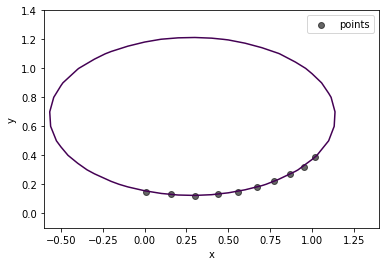

In [18]:
u = np.arange(-0.6, 1.5, 0.1)
v = np.arange(-0.1, 1.5, 0.1)
u, v = np.meshgrid(u,v)
plt.contour(u, v, a*u**2 + b*u*v + c*v**2 + d*u + e*v + 1, [0])
points = plt.scatter(x, y, alpha=0.6, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.legend([points],['points'])
plt.show()

#### Question b

In [10]:
x_0 = np.ones((10,))
y_0 = np.ones((10,))

In [11]:
for i in range(10):
    x_0[i] = x[i] + random.uniform(-0.0005,0.0005)
    y_0[i] = y[i] + random.uniform(-0.0005,0.0005)

In [12]:
x_matrix_new = np.ones((10,5))
for i in range(10):
    x_matrix_new[i][0] = y_0[i]
    x_matrix_new[i][1] = x_0[i]
    x_matrix_new[i][2] = y_0[i] ** 2
    x_matrix_new[i][3] = x_0[i] * y_0[i]
    x_matrix_new[i][4] = x_0[i] ** 2

In [13]:
q_new,r_new = np.linalg.qr(x_matrix)
p_new = np.dot(q_new.T,y_matrix)
a_matrix_new = np.dot(np.linalg.inv(r_new),p_new)

In [14]:
a_new = a_matrix_new[4][0]
b_new = a_matrix_new[3][0]
c_new = a_matrix_new[2][0]
d_new = a_matrix_new[1][0]
e_new = a_matrix_new[0][0]
print(f'a_new = {a_new}')
print(f'b_new = {b_new}')
print(f'c_new = {c_new}')
print(f'd_new = {d_new}')
print(f'e_new = {e_new}')

a_new = 2.253794817514271
b_new = 0.006324713269872717
c_new = 5.522183433130344
d_new = -1.2898102053312357
e_new = -7.377354403400294


with $f = 1$

Comparing the two sets of data, we can see that there is hardly any difference between them. That is to say, the addition of perturbation has little effect on the system. 

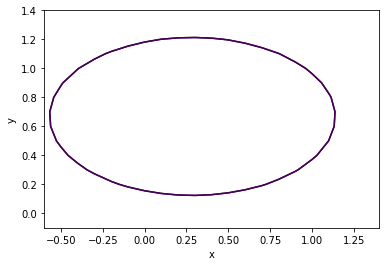

In [28]:
u = np.arange(-0.6, 1.5, 0.1)
v = np.arange(-0.1, 1.5, 0.1)
u_new = np.arange(-0.6, 1.5, 0.1)
v_new = np.arange(-0.1, 1.5, 0.1)
u, v = np.meshgrid(u,v)
u_new, v_new = np.meshgrid(u_new,v_new)
f1 = plt.contour(u, v, a*u**2 + b*u*v + c*v**2 + d*u + e*v + 1, [0])
f2 = plt.contour(u, v, a_new*u_new**2 + b_new*u_new*v_new + c_new*v_new**2 + d_new*u_new + e_new*v_new + 1, [0])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

From this picture, it is not difficult to see that the two fitted images almost completely coincide with each other.So we can say that the addition of perturbations has little effect on our results.